In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import load_mnist
from network import LeNet

ROOT = "./"
BATCH_SIZE = 64
LR = 0.001
EPOCH = 5
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
train_set, test_set, train_loader, test_loader = load_mnist.get_train_test_from_MNIST(root=ROOT, batch_size=BATCH_SIZE)
images, labels = next(iter(train_loader))

In [3]:
model = LeNet().to(DEVICE) # 模型
criterion = nn.CrossEntropyLoss() # 损失函数使用交叉熵
optimizer = optim.Adam(model.parameters(), lr=LR) # 优化函数使用 Adam 自适应优化算法

In [4]:
for epoch in range(EPOCH):
    sum_loss = 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()  # 将梯度归零
        outputs = model(inputs)  # 将数据传入网络进行前向运算
        loss = criterion(outputs, labels)  # 得到损失函数
        loss.backward()  # 反向传播
        optimizer.step()  # 通过梯度做一步参数更新
        sum_loss += loss.item()
        if i % 100 == 99:
            print("[%d, %d] loss: %.03f" % (epoch + 1, i + 1, sum_loss / 100))
            sum_loss = 0.0

[1, 100] loss: 0.689
[1, 200] loss: 0.180
[1, 300] loss: 0.130
[1, 400] loss: 0.101
[1, 500] loss: 0.086
[1, 600] loss: 0.083
[1, 700] loss: 0.077
[1, 800] loss: 0.071
[1, 900] loss: 0.069
[2, 100] loss: 0.056
[2, 200] loss: 0.045
[2, 300] loss: 0.050
[2, 400] loss: 0.053
[2, 500] loss: 0.042
[2, 600] loss: 0.049
[2, 700] loss: 0.058
[2, 800] loss: 0.051
[2, 900] loss: 0.048
[3, 100] loss: 0.041
[3, 200] loss: 0.034
[3, 300] loss: 0.033
[3, 400] loss: 0.035
[3, 500] loss: 0.035
[3, 600] loss: 0.030
[3, 700] loss: 0.038
[3, 800] loss: 0.043
[3, 900] loss: 0.040
[4, 100] loss: 0.024
[4, 200] loss: 0.025
[4, 300] loss: 0.031
[4, 400] loss: 0.025
[4, 500] loss: 0.030
[4, 600] loss: 0.040
[4, 700] loss: 0.024
[4, 800] loss: 0.030
[4, 900] loss: 0.043
[5, 100] loss: 0.019
[5, 200] loss: 0.020
[5, 300] loss: 0.021
[5, 400] loss: 0.021
[5, 500] loss: 0.027
[5, 600] loss: 0.030
[5, 700] loss: 0.029
[5, 800] loss: 0.027
[5, 900] loss: 0.028


In [5]:
model.eval() # 将模型变换为测试模式
correct = 0
total = 0
for data_test in test_loader:
    images, labels = data_test
    images, labels = Variable(images), Variable(labels)
    output_test = model(images)
    _, predicted = torch.max(output_test, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

In [6]:
print("Correct1: ", correct)
print("Test Accuracy: {0}".format(correct.item() / len(test_set)))

Correct1:  tensor(9904)
Test Accuracy: 0.9904


In [7]:
torch.save(model, "./model.pkl")

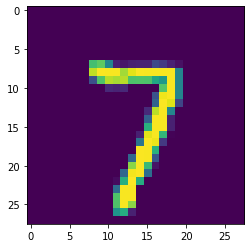

In [8]:
from matplotlib import pyplot as plt
plt.imshow(images[0][0])
plt.show()